In [1]:
import keras, tensorflow as tf
import pandas as pd,numpy as np
from sklearn.preprocessing import OneHotEncoder
import config
from data import get_data,DataGenerator,start_video_eval
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from keras.optimizers import Adam
from keras.layers import Conv2D,BatchNormalization
from keras.layers import MaxPool2D, MaxPooling2D,Input,Concatenate
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Model



2023-09-24 19:14:28.959325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 19:14:34.979361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)
#     print(tf.config.experimental.get_memory_growth(gpu))

tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*3.5)])


2023-09-24 19:14:49.946092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 19:14:52.154371: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 19:14:52.155695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# # for downloading dataset

# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="xEsIaDiMVG9KN7OLrIfS")
# project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
# dataset = project.version(12).download("retinanet")


In [2]:
# load the training dataset
f_name,box,labels = get_data('train')
print(f_name.shape,box.shape,labels.shape)
# Data gen
# load the validation dataset
d_gen = DataGenerator(f_name,box,labels,'train',config.BATCH_SIZE)
f_valid, box_val, labels_valid = get_data('valid')
v_gen = DataGenerator(f_valid,box_val,labels_valid,'valid',config.BATCH_SIZE)


(12090,) (12090, 4) (12090, 3)


(64, 64, 3)
16
[['Rock']]
[0.3953125, 0.540625, 0.840625, 0.8375]


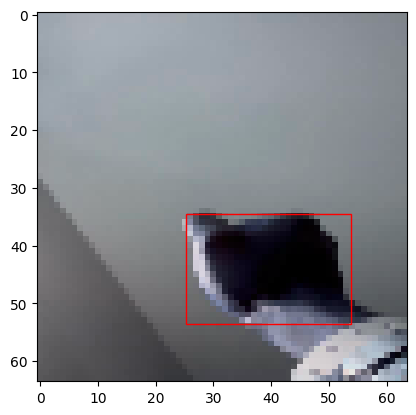

(64, 64, 3)
16
[[None]]
[0.0, 0.0, 0.0, 0.0]


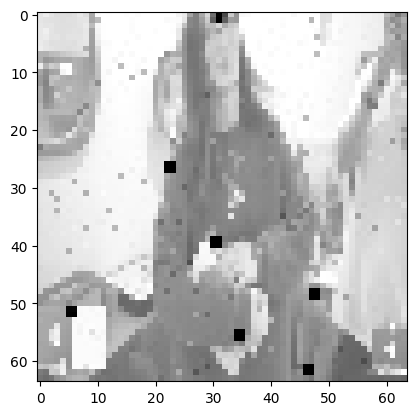

(64, 64, 3)
16
[['Paper']]
[0.49375, 0.0875, 0.828125, 0.6046875]


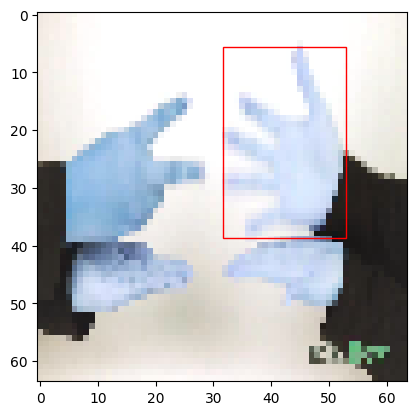

(64, 64, 3)
16
[['Rock']]
[0.3328125, 0.5359375, 0.421875, 0.6984375]


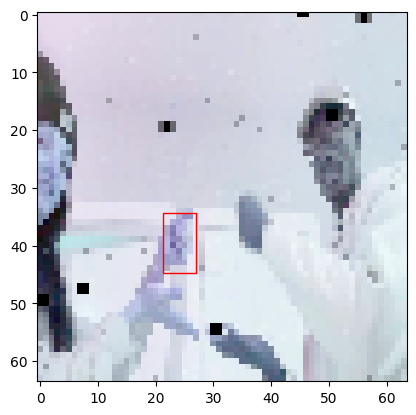

(64, 64, 3)
16
[['Paper']]
[0.2625, 0.6125, 0.4078125, 0.9921875]


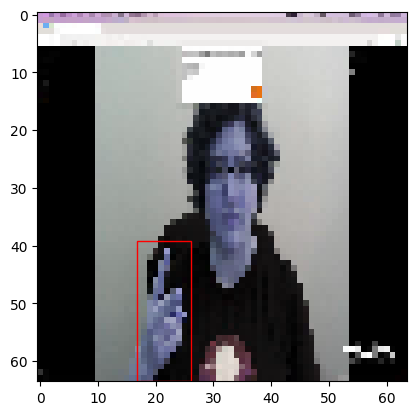

(64, 64, 3)
16
[['Scissors']]
[0.66875, 0.5578125, 0.9234375, 0.8109375]


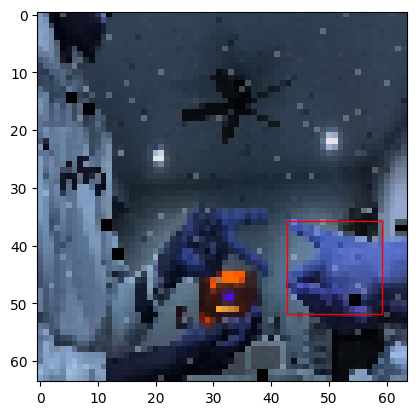

(64, 64, 3)
16
[[None]]
[0.0, 0.0, 0.0, 0.0]


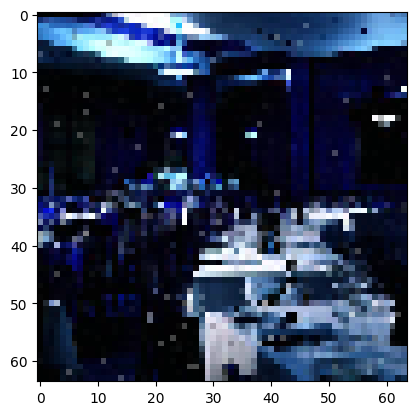

(64, 64, 3)
16
[['Scissors']]
[0.021875, 0.2234375, 0.484375, 0.7140625]


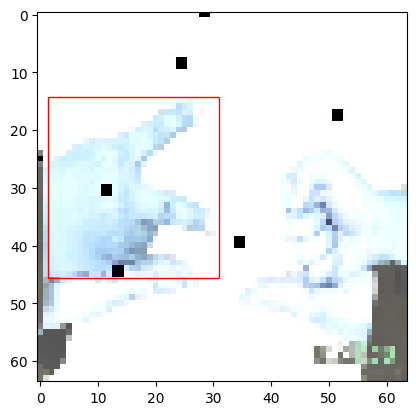

(64, 64, 3)
16
[[None]]
[0.0, 0.0, 0.0, 0.0]


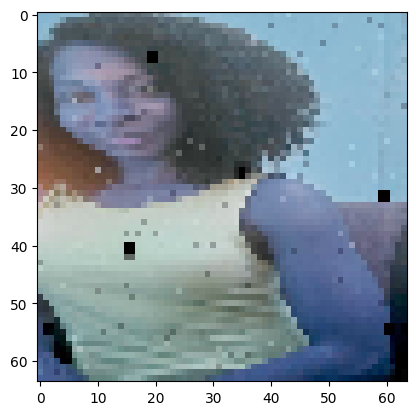

(64, 64, 3)
16
[['Rock']]
[0.171875, 0.2578125, 0.6453125, 0.6515625]


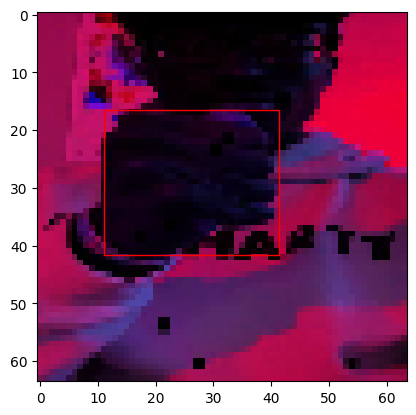

(64, 64, 3)
16
[['Paper']]
[0.0609375, 0.5921875, 0.8671875, 1.0]


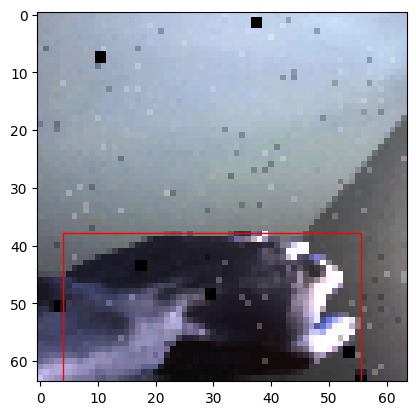

(64, 64, 3)
16
[['Paper']]
[0.3046875, 0.6015625, 0.7328125, 0.8734375]


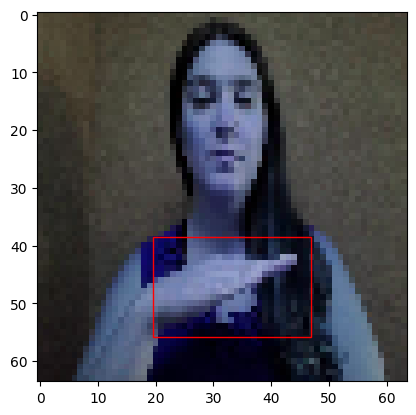

(64, 64, 3)
16
[['Scissors']]
[0.7828125, 0.2140625, 0.9265625, 0.428125]


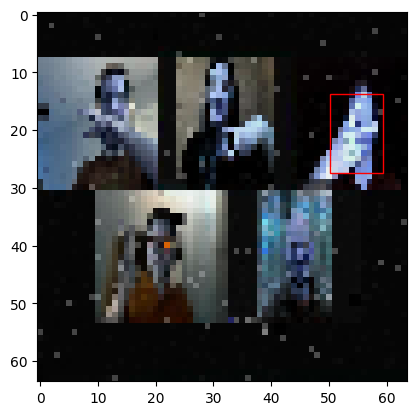

(64, 64, 3)
16
[['Rock']]
[0.484375, 0.5375, 0.728125, 0.8296875]


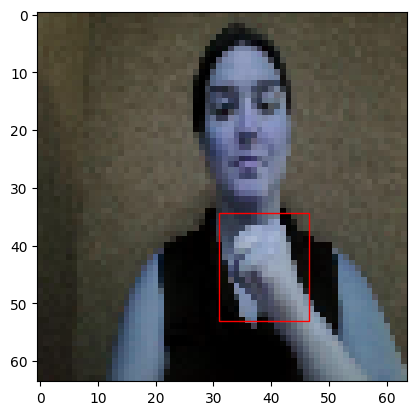

(64, 64, 3)
16
[[None]]
[0.0, 0.0, 0.0, 0.0]


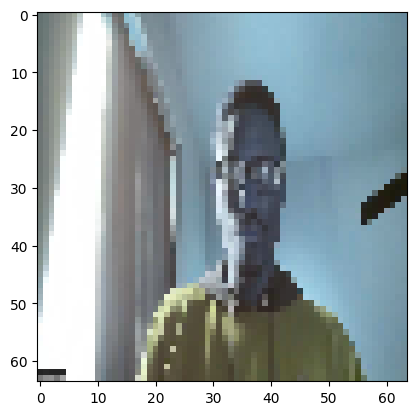

(64, 64, 3)
16
[['Scissors']]
[0.340625, 0.5015625, 0.9984375, 1.0]


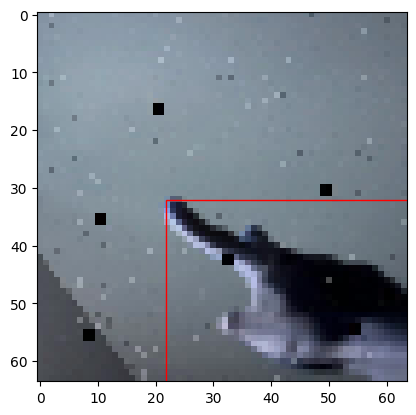

IndexError: index 16 is out of bounds for axis 0 with size 16

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# verifying whether the data generator works correctly
i,u = d_gen.__getitem__(0)
num = 0
input 
while 1:
    im = (i[num]*255).astype(int)
    print(im.shape)

   
    print(len(i))
    # Create figure and axes
    fig, ax = plt.subplots()
    h,w,_ = im.shape

    # Display the image
    ax.imshow(im)
    with open('ohencoder.pickle','rb') as f:
        import pickle 
        ohe = pickle.load(f)
    print(ohe.inverse_transform(u['class_label'].iloc[num].to_numpy().reshape(-1,3)))

    box = list(u['bounding_box'].iloc[num,:])
    print(box)
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0]*128, box[1]*128), (box[2]-box[0])*128, (box[3]-box[1])*128, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()
    num += 1
    input()

In [1]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="xEsIaDiMVG9KN7OLrIfS")
# project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
# dataset = project.version(2).download("retinanet")


/bin/bash: /home/onu/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
loading Roboflow workspace...
loading Roboflow project...

Version export complete for retinanet format



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-2 in retinanet:: 100%|██████████| 842/842 [00:00<00:00, 4892.67it/s]


In [3]:
# all the second generators are for classification only 
# use d_gen for both bounding box and labels 
# load the training dataset
f_name,box,labels = get_data('train')
print(f_name.shape,box.shape,labels.shape)
# Data gen complete
d_gen2 = DataGenerator(f_name,box,labels,'train',config.BATCH_SIZE,has_boxes=False)
# x,y = np.array([
#                 cv2.resize(cv2.imread(os.path.join(config.DATASET_DIR,'train', str(file_name))), (128, 128))
#                 for file_name in f_name])/255.0,  np.array(labels).astype(int)
f_valid, box_val, labels_valid = get_data('valid')
v_gen2 = DataGenerator(f_valid,box_val,labels_valid,'valid',config.BATCH_SIZE,has_boxes=False)


(12090,) (12090, 4) (12090, 3)


# MODEL BUILDING

In [3]:
# classification model for predicting classes on cropped objects 
x_iso, iso_boxes, iso_labels = get_data("train",dataset="/home/onu/ml/Rock-Paper-Scissors-SXSW-2")
iso_d_gen = DataGenerator(x_iso,iso_boxes,iso_labels,'train',batch_size=config.BATCH_SIZE,has_boxes=False,dataset="/home/onu/ml/Rock-Paper-Scissors-SXSW-2")
vx_iso, viso_boxes, viso_labels = get_data("valid",dataset="/home/onu/ml/Rock-Paper-Scissors-SXSW-2")
iso_v_gen = DataGenerator(vx_iso,viso_boxes,viso_labels,'valid',batch_size=config.BATCH_SIZE,has_boxes=False,dataset="/home/onu/ml/Rock-Paper-Scissors-SXSW-2")


model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(128,128,3)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation = "softmax")) #Classification layer or output layer

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
model.fit(iso_d_gen,validation_data=iso_v_gen,epochs = 20,batch_size=config.BATCH_SIZE,callbacks=[es])
# model.fit_generator(d_gen, validation_data=(x_valid, labels_valid), epochs=epochs)
# Final evaluation of the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

2023-09-24 19:14:54.839955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 19:14:54.840920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 19:14:54.841701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 batch_normalization (Batch  (None, 124, 124, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 64)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 60, 60, 64)        256       
 chNormalization)                                                
                                                        

2023-09-24 19:14:59.070893: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-09-24 19:15:00.511495: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-24 19:15:07.171096: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8208d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-24 19:15:07.171205: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-09-24 19:15:07.798121: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-24 19:15:10.050161: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled 

36/36 [==============================] - 33s 309ms/step - loss: 1.6275 - accuracy: 0.4308 - val_loss: 22.0522 - val_accuracy: 0.3609
Epoch 2/20
36/36 [==============================] - 6s 157ms/step - loss: 1.1599 - accuracy: 0.5499 - val_loss: 2.1538 - val_accuracy: 0.2485
Epoch 3/20
36/36 [==============================] - 6s 157ms/step - loss: 1.0377 - accuracy: 0.6112 - val_loss: 2.4433 - val_accuracy: 0.2959
Epoch 4/20
36/36 [==============================] - 6s 157ms/step - loss: 1.0263 - accuracy: 0.5849 - val_loss: 2.0060 - val_accuracy: 0.3609
Epoch 5/20
36/36 [==============================] - 6s 157ms/step - loss: 0.9517 - accuracy: 0.6200 - val_loss: 2.4697 - val_accuracy: 0.3609
Epoch 6/20
36/36 [==============================] - 6s 157ms/step - loss: 0.7277 - accuracy: 0.6918 - val_loss: 1.2844 - val_accuracy: 0.4201
Epoch 7/20
36/36 [==============================] - 6s 158ms/step - loss: 0.7903 - accuracy: 0.6865 - val_loss: 1.1156 - val_accuracy: 0.5148
Epoch 8/20
36/3

In [4]:
model.save("iso_class_cnn.keras")


In [4]:
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

# Flatten the output for fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional dropout layer for regularization
model.add(Dense(3, activation='softmax')) 
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()

model.fit(d_gen,validation_data = v_gen,batch_size = config.BATCH_SIZE)

2023-09-24 18:38:46.981751: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 18:38:47.015099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 18:38:47.015464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

2023-09-24 18:38:49.181514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-24 18:38:50.098261: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9f180828f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-24 18:38:50.098367: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-09-24 18:38:50.594576: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-24 18:38:52.522384: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


152/152 [==============================] - 62s 357ms/step - loss: 549619.0625 - accuracy: 0.3224 - val_loss: 477741.8750 - val_accuracy: 0.5347


In [6]:
model.save("isolate_class_model.keras")

In [5]:
keras.backend.clear_session()

In [30]:
keras.backend.clear_session()
test_name, test_box,test_labels = get_data('test')
t_gen = DataGenerator(test_name,test_box,test_labels,'test',batch_size=16,has_boxes=False)

test_model = tf.keras.models.load_model('isolate_class_model.keras')
test_model.evaluate(t_gen)

14/14 [==============================] - 3s 181ms/step - loss: 2.8950 - accuracy: 0.3750


[2.895040512084961, 0.375]

### Video input classification on both classification and detection model

In [3]:
import pickle
model = tf.keras.models.load_model('isolate_class_model.keras')

with open('ohencoder.pickle','rb') as f:        
        ohe = pickle.load(f)

start_video_eval(model,ohe,has_boxes=False)


2023-09-24 12:28:16.154444: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 12:28:16.155359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-24 12:28:16.156123: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 1s 1s/step

1/1 [==============================] - 0s 19ms/step


libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast



1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 15ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17m

In [6]:
# Create the model
keras.backend.clear_session()
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu',input_shape=(128,128,3)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Compile model
# opt = Adam(lr=0.001)
# model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
flatten = model.output
flatten = Flatten()(flatten)

bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid",
	name="bounding_box")(bboxHead)
# construct a second fully-connected layer head, this one to predict
# the class label
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(256, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.5)(softmaxHead)
softmaxHead = Dense(3, activation="softmax",
	name="class_label")(softmaxHead)

c_model = Model(
	inputs=model.input,
	outputs=(bboxHead, softmaxHead))

losses = {
	"class_label": "categorical_crossentropy",
	"bounding_box": "mean_squared_error",
}
# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
	"class_label": 1.0,
	"bounding_box": 1.0
}
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr=0.001)
c_model.compile(loss=losses, optimizer=opt, metrics=["accuracy"], loss_weights=lossWeights)
print(c_model.summary())
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
# Fit the model
c_model.fit(d_gen, validation_data = v_gen, epochs=75,batch_size=config.BATCH_SIZE,callbacks=[es])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_9_input (InputLayer  [(None, 128, 128, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 conv2d_9 (Conv2D)           (None, 126, 126, 64)         1792      ['conv2d_9_input[0][0]']      
                                                                                                  
 batch_normalization_8 (Bat  (None, 126, 126, 64)         256       ['conv2d_9[0][0]']            
 chNormalization)                                                                                 
                                                                                              

2023-09-24 18:53:07.659399: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


152/152 [==============================] - 57s 298ms/step - loss: 3.6352 - bounding_box_loss: 0.1039 - class_label_loss: 3.5313 - bounding_box_accuracy: 0.3351 - class_label_accuracy: 0.3326 - val_loss: 12.5716 - val_bounding_box_loss: 0.1064 - val_class_label_loss: 12.4652 - val_bounding_box_accuracy: 0.3264 - val_class_label_accuracy: 0.2361
Epoch 2/75
152/152 [==============================] - 26s 173ms/step - loss: 186.1720 - bounding_box_loss: 0.1019 - class_label_loss: 186.0701 - bounding_box_accuracy: 0.3713 - class_label_accuracy: 0.3215 - val_loss: 706.2513 - val_bounding_box_loss: 0.1088 - val_class_label_loss: 706.1424 - val_bounding_box_accuracy: 0.3819 - val_class_label_accuracy: 0.2361
Epoch 3/75
105/152 [===================>..........] - ETA: 6s - loss: 660.0791 - bounding_box_loss: 0.0962 - class_label_loss: 659.9828 - bounding_box_accuracy: 0.3714 - class_label_accuracy: 0.3327

KeyboardInterrupt: 

In [ ]:
c_model.save("class_and_box_cnn.keras")
test_name, test_box,test_labels = get_data('test')
t_gen = DataGenerator(test_name,test_box,test_labels,'test',16)
c_model.evaluate(t_gen)